In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [30]:
print('Current working directory: ',os.getcwd())

Current working directory:  C:\Users\Shimul\Documents\Building CSE 4000 Thesis


## Dataset path location using glob

In [31]:
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')


In [32]:
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))

Building house data :  216
Mosque data:  324
Temple data:  263
Tinshed data:  187


In [33]:
dataset_classes=[building_house,mosque,temple,tinshed]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  4


## Dataset Preprocessing using ImageDataGenerator

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
train_image_generator = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    shear_range=0.2 ,
                                    zoom_range=0.2,
                                    rotation_range=45,
                                    height_shift_range=0.5,
                                    fill_mode='nearest',
                                    validation_split=0.2)   

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(224, 224),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='dataset_building',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 794 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

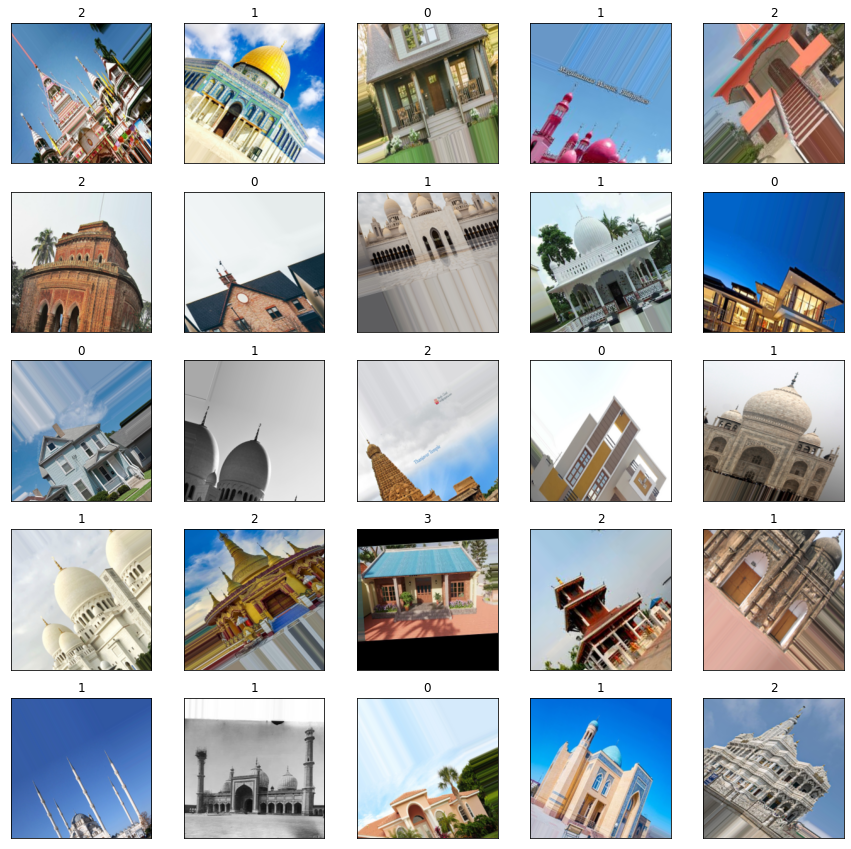

In [36]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import Mobile Net v2

In [37]:
from tensorflow.keras.applications import MobileNetV2

In [38]:
base_model=MobileNetV2(input_shape=(224,224,3),include_top=False)

In [39]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [40]:
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

## Import tensorflow

In [41]:
import tensorflow 

In [42]:
model = tensorflow.keras.Sequential([
  base_model,
  tensorflow.keras.layers.GlobalAveragePooling2D(),
  tensorflow.keras.layers.Dense(total_class, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


## Compile the model

In [43]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [44]:
epochs=20
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

794
196
24
6


In [45]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps)

Epoch 1/20
24/24 [==============================] - 42s 2s/step - loss: 1.0446 - accuracy: 0.5617 - val_loss: 0.7982 - val_accuracy: 0.7031
Epoch 2/20
24/24 [==============================] - 26s 1s/step - loss: 0.6424 - accuracy: 0.7572 - val_loss: 0.6628 - val_accuracy: 0.7031
Epoch 3/20
24/24 [==============================] - 25s 1s/step - loss: 0.5137 - accuracy: 0.8097 - val_loss: 0.5574 - val_accuracy: 0.7552
Epoch 4/20
24/24 [==============================] - 27s 1s/step - loss: 0.4595 - accuracy: 0.8215 - val_loss: 0.5320 - val_accuracy: 0.8177
Epoch 5/20
24/24 [==============================] - 26s 1s/step - loss: 0.4211 - accuracy: 0.8451 - val_loss: 0.4709 - val_accuracy: 0.8281
Epoch 6/20
24/24 [==============================] - 26s 1s/step - loss: 0.3919 - accuracy: 0.8504 - val_loss: 0.4627 - val_accuracy: 0.8438
Epoch 7/20
24/24 [==============================] - 26s 1s/step - loss: 0.3711 - accuracy: 0.8596 - val_loss: 0.5549 - val_accuracy: 0.7865
Epoch 8/20
24/24 [==

## Plot Accuracy and Loss Graph

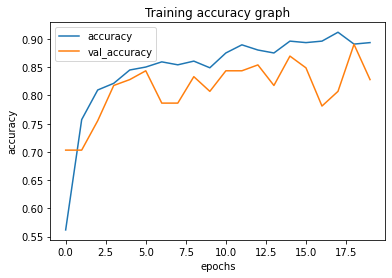

In [59]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

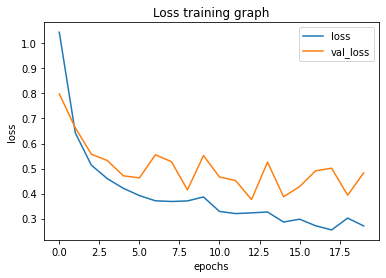

In [60]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [48]:
test_loss,test_accuracy=model.evaluate(validation_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

7/7 [==============================] - 5s 736ms/step - loss: 0.4599 - accuracy: 0.8265
Test Loss:  0.459940105676651
Test Accuracy:  0.8265306353569031


In [49]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  82.65306353569031


## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

In [50]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[1.1674166e-03 5.3928196e-03 8.4996456e-05 5.8099627e-04]]
1


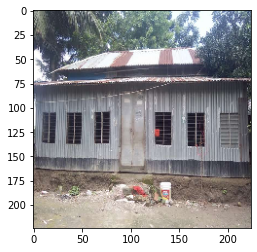

In [57]:
random_image=image.load_img('tinshed19.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0.00206092 0.03888711 0.00076509 0.0013026 ]]
1


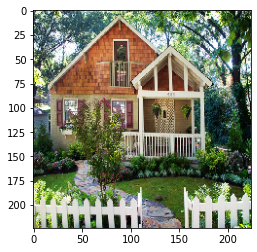

In [58]:
random_image=image.load_img('building0.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0.00196198 0.01232052 0.00014171 0.00012219]]
1


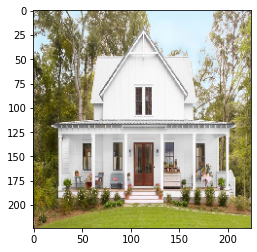

In [56]:
random_image=image.load_img('building1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[0.00031555 0.00747681 0.00028551 0.00023308]]
1


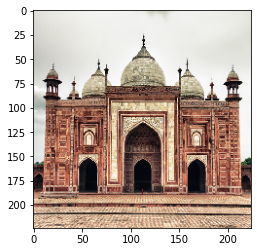

In [55]:
random_image=image.load_img('mosque35.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
print(np.argmax(predicted_class))